### Importing Libraries


In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px
import statsmodels.api as sm

import random

import json

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import auc,roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import norm, skew
from category_encoders.one_hot import OneHotEncoder

import missingno as mno
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE

### Importing Dataset

In [178]:
leadscore = pd.read_csv("data/Lead Scoring.csv")
leadscore.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [179]:
print("Shape of Dataset is : ",leadscore.shape)

Shape of Dataset is :  (9240, 37)


In [180]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [181]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### EDA and FE (Data Cleaning)

In [182]:
# check for duplicate

leadscore.duplicated().any()

False

In [183]:
# handling missing values

total = leadscore.isnull().sum().sort_values(ascending = False)
percent = (leadscore.isnull().sum()/leadscore.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


<AxesSubplot: >

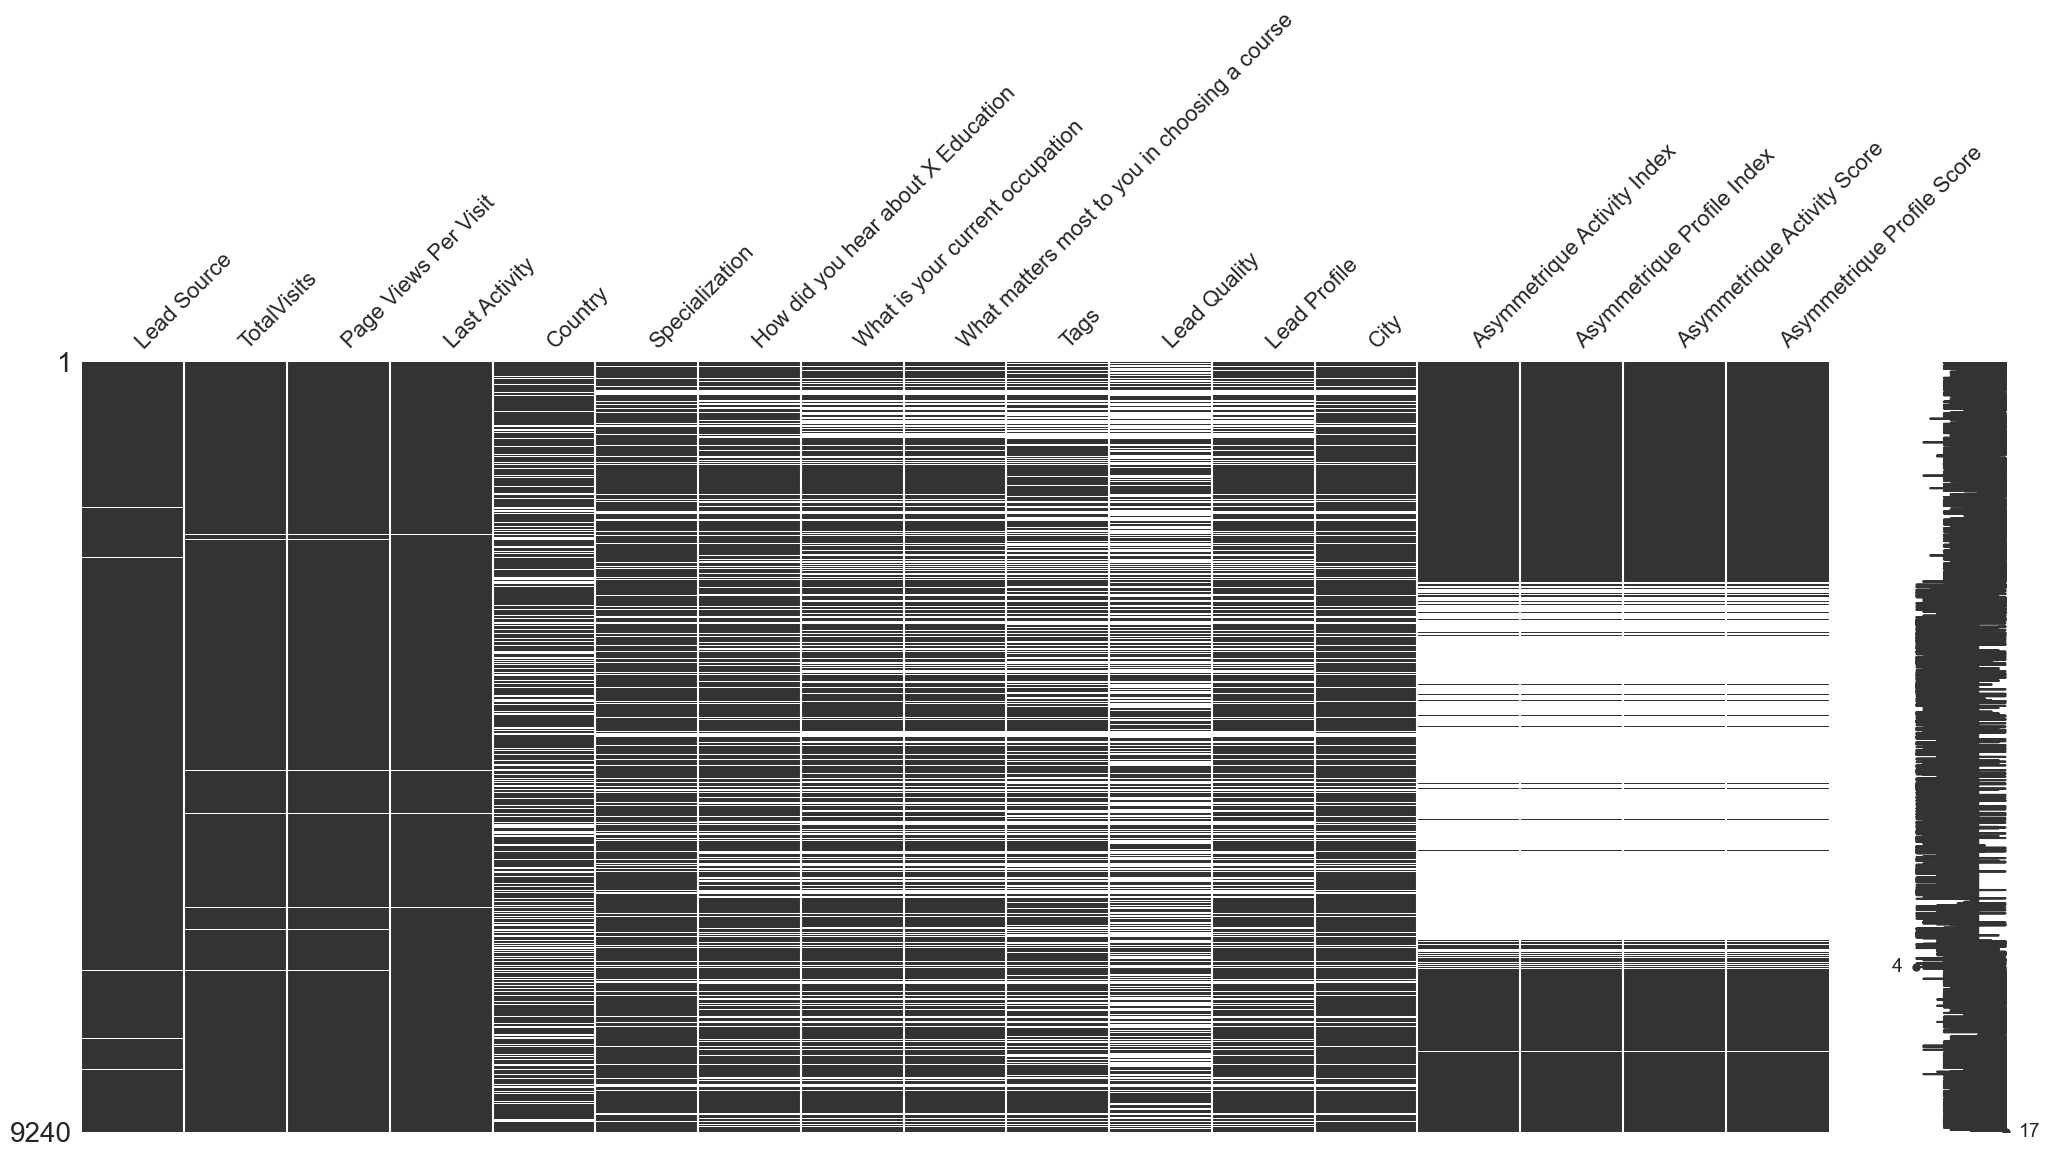

In [184]:
#visualizing columns with missing values
missing_col = [col for col in leadscore.columns if leadscore[col].isna().any()]
mno.matrix(leadscore[missing_col], color = '0.2')

In [185]:
# drop columns with more than 45% of missing values

missing_cols = [col for col in leadscore.columns if (leadscore[col].isna().sum()/leadscore.shape[0]*100) > 40]
leadscore.drop(missing_cols, axis = 1, inplace = True)

In [186]:
## checking missing values

total = leadscore.isnull().sum().sort_values(ascending = False)
percent = (leadscore.isnull().sum()/leadscore.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# number of columns reduced to 32

,Total,Percent
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
How did you hear about X Education,2207,23.89
Specialization,1438,15.56
City,1420,15.37
TotalVisits,137,1.48
Page Views Per Visit,137,1.48


In [187]:
# columns that can be dropped
# keep appending as we find columns that can be droppped

columns_drop = ["Prospect ID", "Lead Number" ]
leadscore.drop(columns=columns_drop, inplace=True,axis=1)

In [188]:
leadscore.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


##### Continuous Features

In [189]:
continuous_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

In [190]:
leadscore.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [191]:
def missing_values(df,col):
    return df[col].isnull().sum()

In [192]:
def continuous_features_imputing(df, col): ## replacing missing values to median
    return leadscore[col].fillna(leadscore[col].median(), inplace=True)

In [193]:
for i in continuous_features:
    continuous_features_imputing(leadscore, i)

In [194]:
leadscore.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

##### Categorical Features

In [195]:
(leadscore.isna().sum()).sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Lead Origin                                         0
Digital Advertisement                               0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Magazine                    

In [196]:
categorical_data = ["Lead Source", "Country", "Specialization", "How did you hear about X Education", 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',"Lead Profile", "City", "Last Activity"]

In [197]:
## for categorical values data can we replace with most repeating category
for i in categorical_data:
    indexes = leadscore[i].value_counts().index
    if "Select" in indexes:
        leadscore[i]=leadscore[i].replace("Select","Unknown")
    leadscore[i]=leadscore[i].fillna(indexes[0])


In [198]:
(leadscore.isna().sum()).sort_values(ascending=False)

Tags                                             3353
Lead Origin                                         0
Lead Source                                         0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
City                                                0
Lead Profile                                        0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
What matters most to you in choosing a course       0
What is your current occupat

In [199]:
## Dealing with Lead Source column

leadscore['Lead Source'].replace('google','Google',inplace = True)
leadscore['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
leadscore['Lead Source'].replace('Facebook','Social Media',inplace = True)
leadscore['Lead Source'].replace('welearnblog_Home','blog',inplace = True)
leadscore["Lead Source"].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [200]:
## dealing with Country and City Column
leadscore["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [201]:
leadscore.loc[leadscore['Country']!='India','City']="Other International Cities"
leadscore[leadscore['Country']!='India']['City']
leadscore["City"].value_counts()

## most of the values in country column are India, so this feature can be dropped

Mumbai                         4522
Unknown                        2216
Thane & Outskirts               731
Other Cities                    619
Other Cities of Maharashtra     434
Other Metro Cities              360
Other International Cities      287
Tier II Cities                   71
Name: City, dtype: int64

In [202]:
## removing Data that still shows some skewness
categorical_columns = leadscore.select_dtypes(include=['object']).columns
for x in leadscore[categorical_columns]:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

Lead Origin :  52.88 %
Lead Source :  31.48 %
Do Not Email :  92.06 %
Do Not Call :  99.98 %
Last Activity :  38.31 %
Country :  96.89 %
Specialization :  21.02 %
How did you hear about X Education :  54.58 %
What is your current occupation :  89.72 %
What matters most to you in choosing a course :  99.97 %
Search :  99.85 %
Magazine :  100.0 %
Newspaper Article :  99.98 %
X Education Forums :  99.99 %
Newspaper :  99.99 %
Digital Advertisement :  99.96 %
Through Recommendations :  99.92 %
Receive More Updates About Our Courses :  100.0 %
Tags :  35.2 %
Update me on Supply Chain Content :  100.0 %
Get updates on DM Content :  100.0 %
Lead Profile :  44.87 %
City :  48.94 %
I agree to pay the amount through cheque :  100.0 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


In [203]:
for x in leadscore[categorical_columns]:
    if (int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts())))*100>80:
        columns_drop.append(x)
        del leadscore[x]

In [204]:
categorical_columns = leadscore.select_dtypes(include=['object']).columns
for x in leadscore[categorical_columns]:
    print(x,": ",round(int(list(leadscore[x].value_counts())[0])/int(sum(leadscore[x].value_counts()))*100,2),"%")

Lead Origin :  52.88 %
Lead Source :  31.48 %
Last Activity :  38.31 %
Specialization :  21.02 %
How did you hear about X Education :  54.58 %
Tags :  35.2 %
Lead Profile :  44.87 %
City :  48.94 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


In [205]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   How did you hear about X Education      9240 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  Lead Profile                            9240 non-null   obje

In [206]:
## missing values check
x = (leadscore.isna().sum()/leadscore.shape[0]*100)
x[x > 0].sort_values(ascending = False)

Tags    36.287879
dtype: float64

In [207]:
leadscore.drop(columns=["Tags"], inplace=True, axis=1)
columns_drop.append("Tags")

#####  Some Visualizations

In [208]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

In [209]:
leadscore[continuous_features]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.00
1,5.0,674,2.50
2,2.0,1532,2.00
3,1.0,305,1.00
4,2.0,1428,1.00
...,...,...,...
9235,8.0,1845,2.67
9236,2.0,238,2.00
9237,2.0,199,2.00
9238,3.0,499,3.00


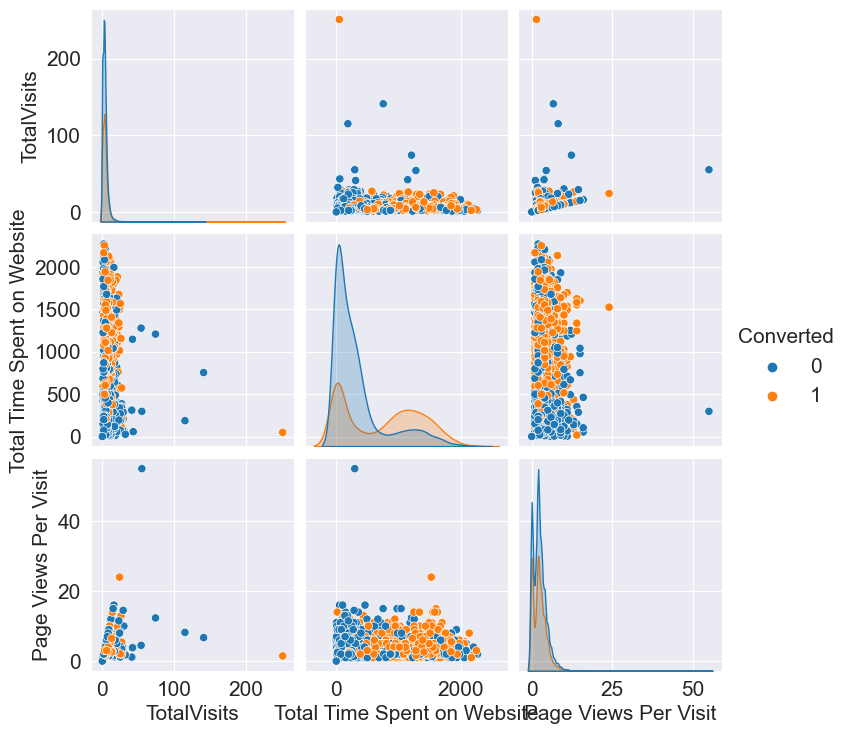

In [210]:
sns.pairplot(leadscore,diag_kind='kde',hue='Converted')
plt.show()

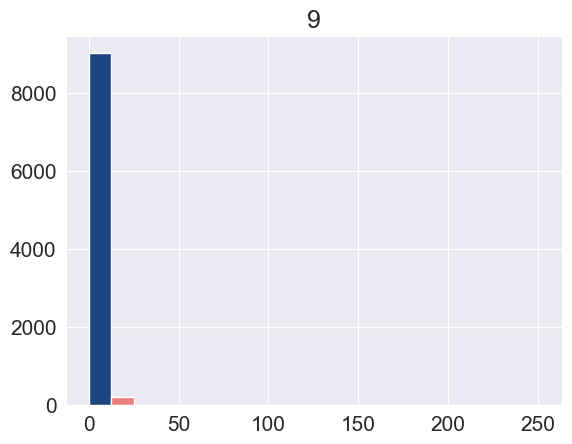

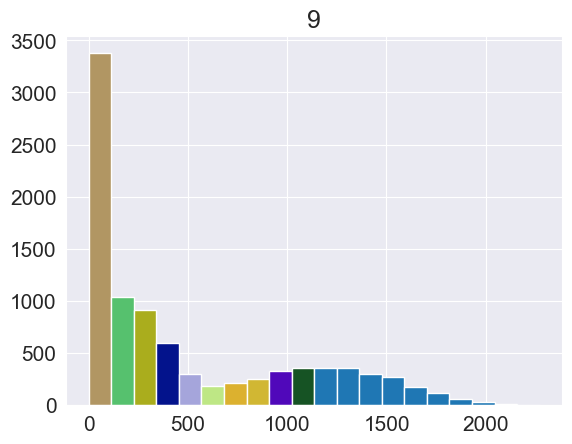

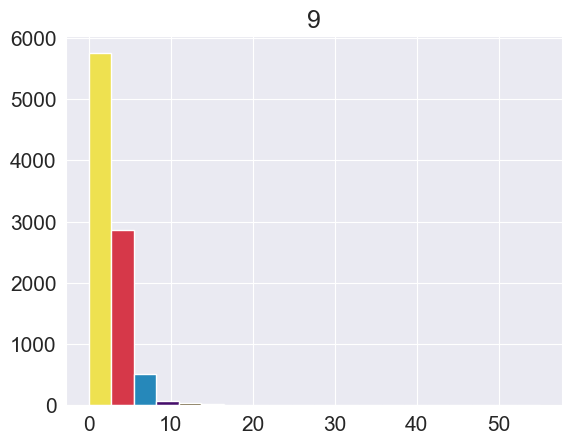

In [211]:
for i in continuous_features:
    sns.set_style("darkgrid")
    fig, ax = plt.subplots()
    N,bins,patches = ax.hist(leadscore[i],bins=20)
    for i in range(10):
        patches[i].set_facecolor(randomcolor())
    plt.title(i)
    plt.show()

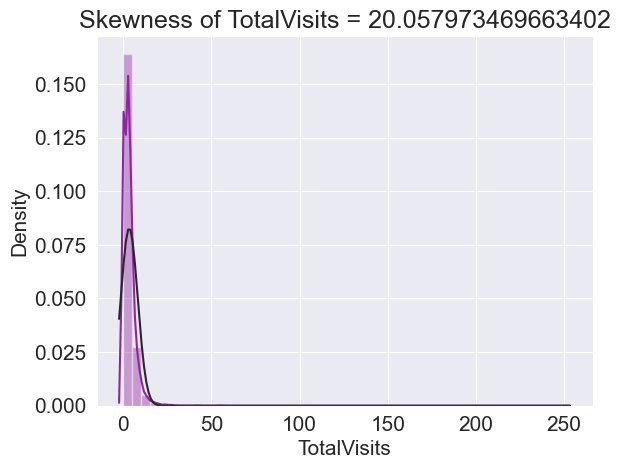

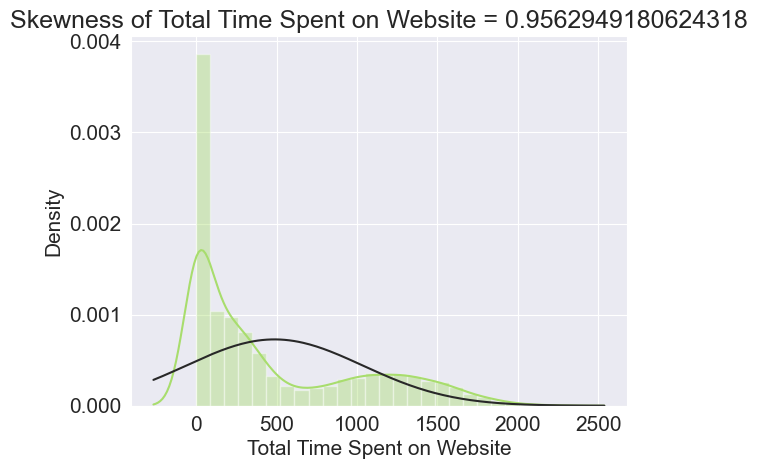

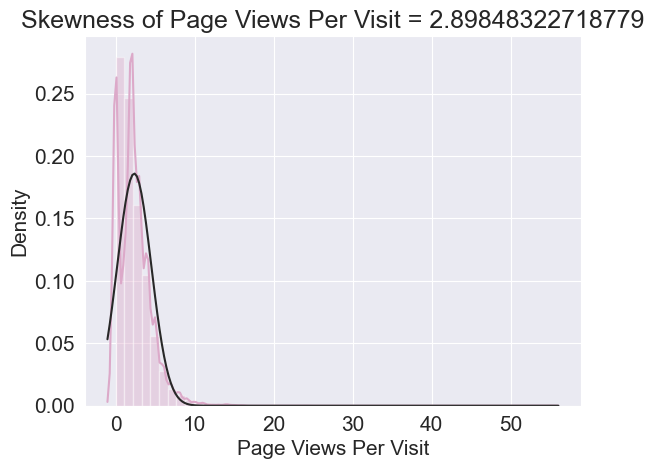

In [212]:
for i in continuous_features:
    skewness = str(skew(leadscore[i]))
    sns.distplot(leadscore[i],fit = norm,color = randomcolor())
    plt.title("Skewness of " + i + ' = '+ skewness)
    plt.show()

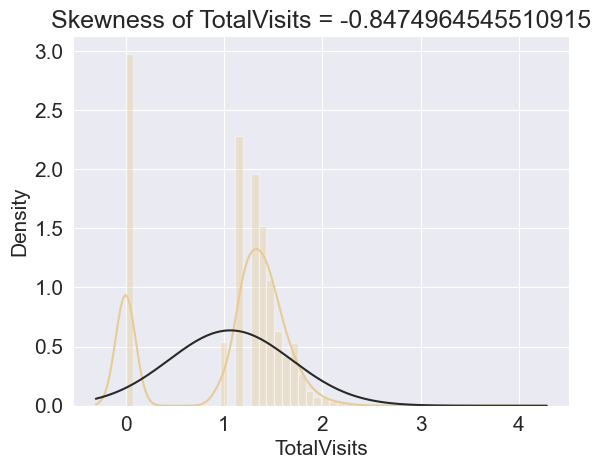

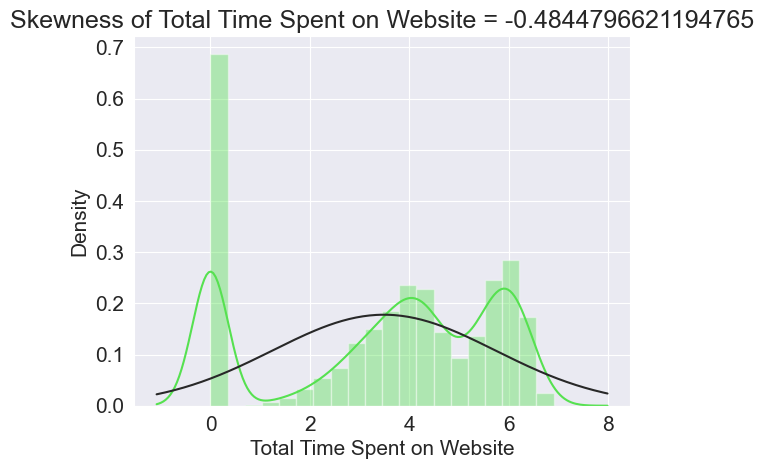

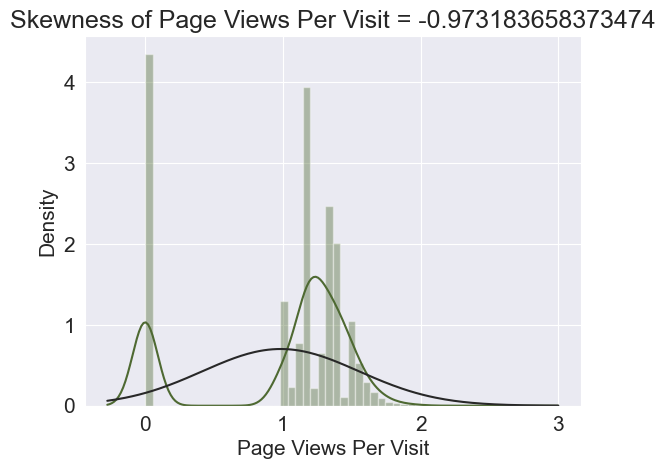

In [214]:
for i in continuous_features:
    leadscore[i] = np.sqrt(leadscore[i])
    skewness = str(skew(leadscore[i]))
    sns.distplot(leadscore[i],fit = norm,color = randomcolor())
    plt.title("Skewness of " +i + ' = '+ skewness)
    plt.show()

##### Categorical Features

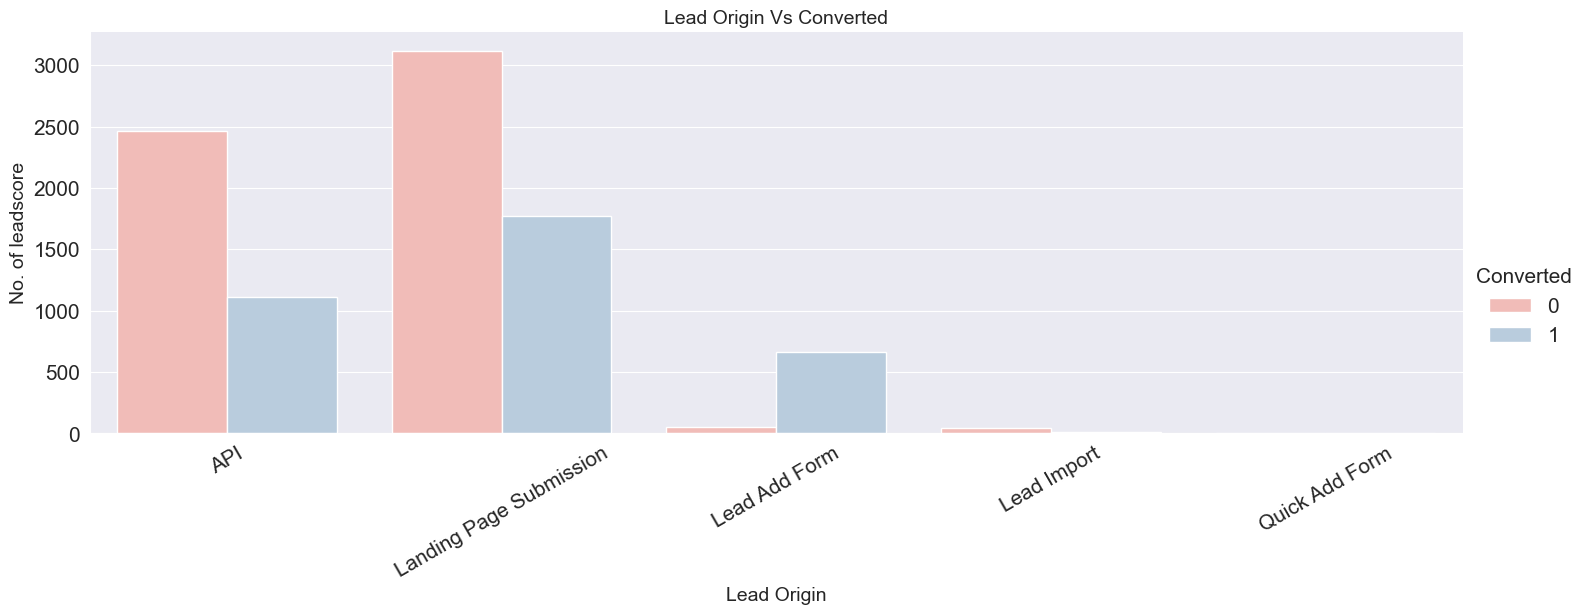

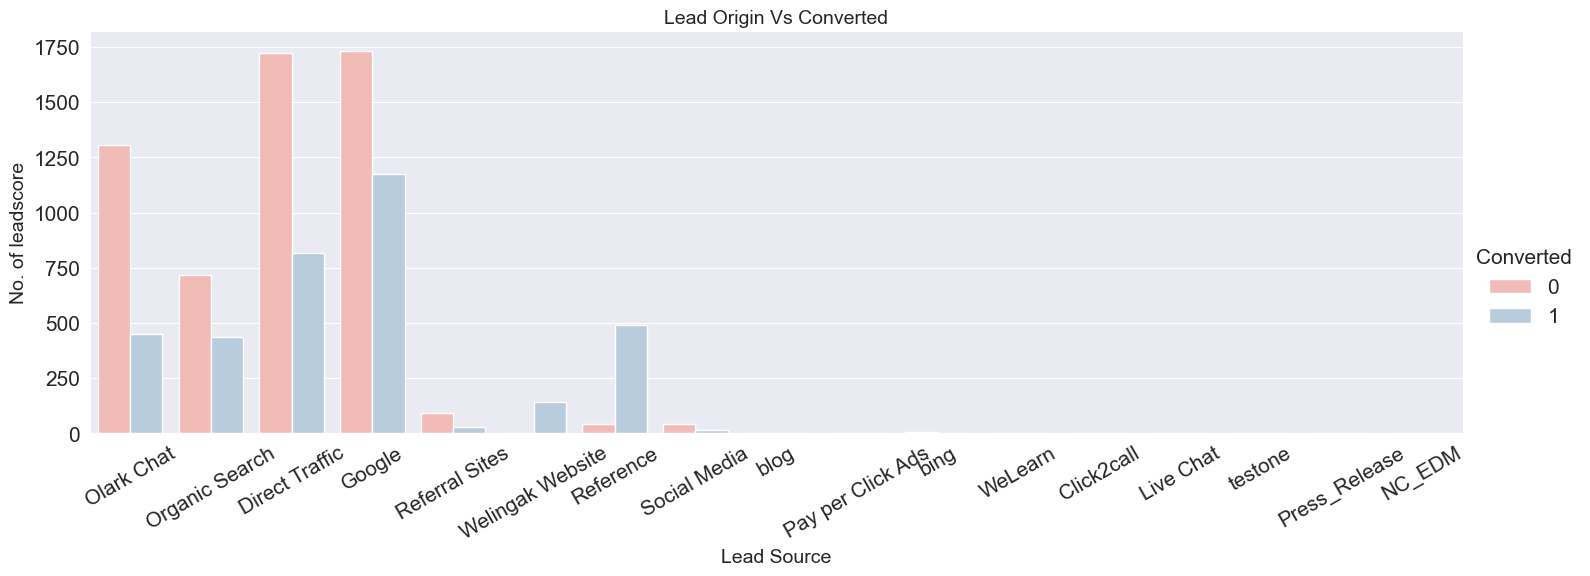

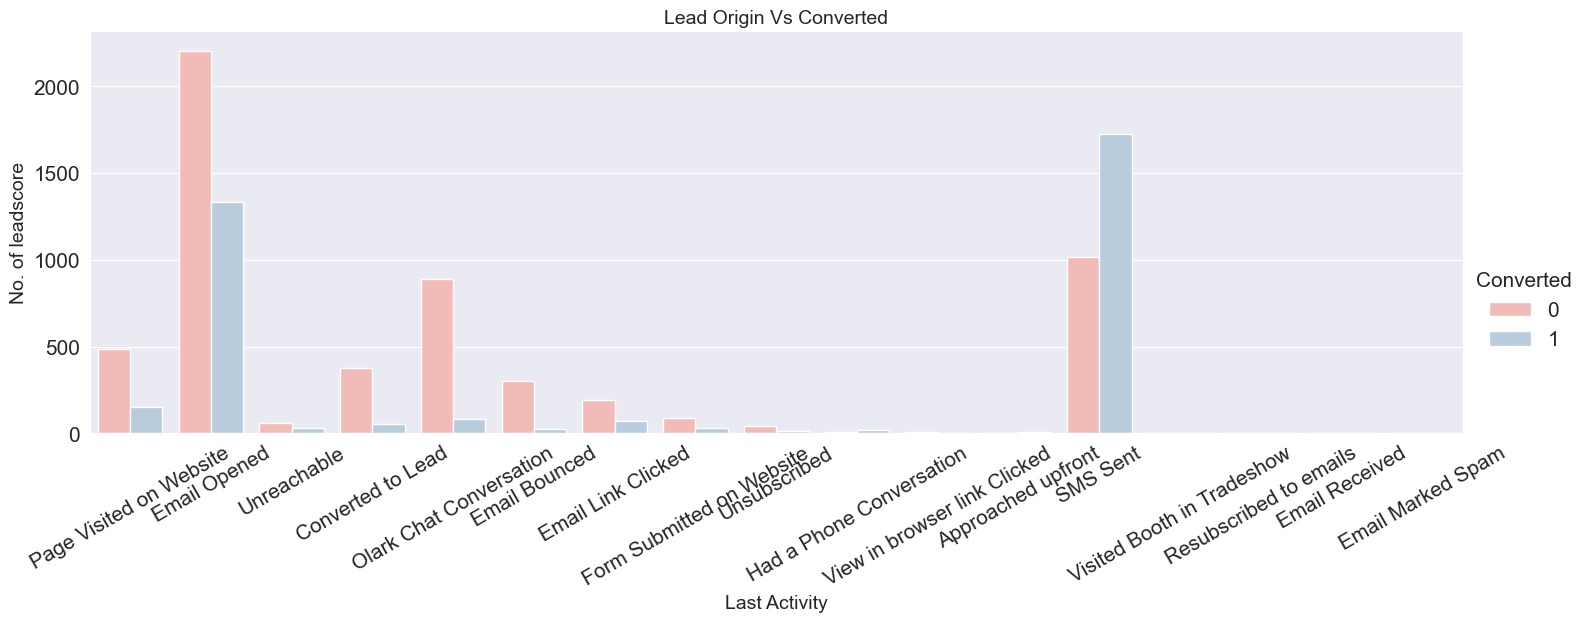

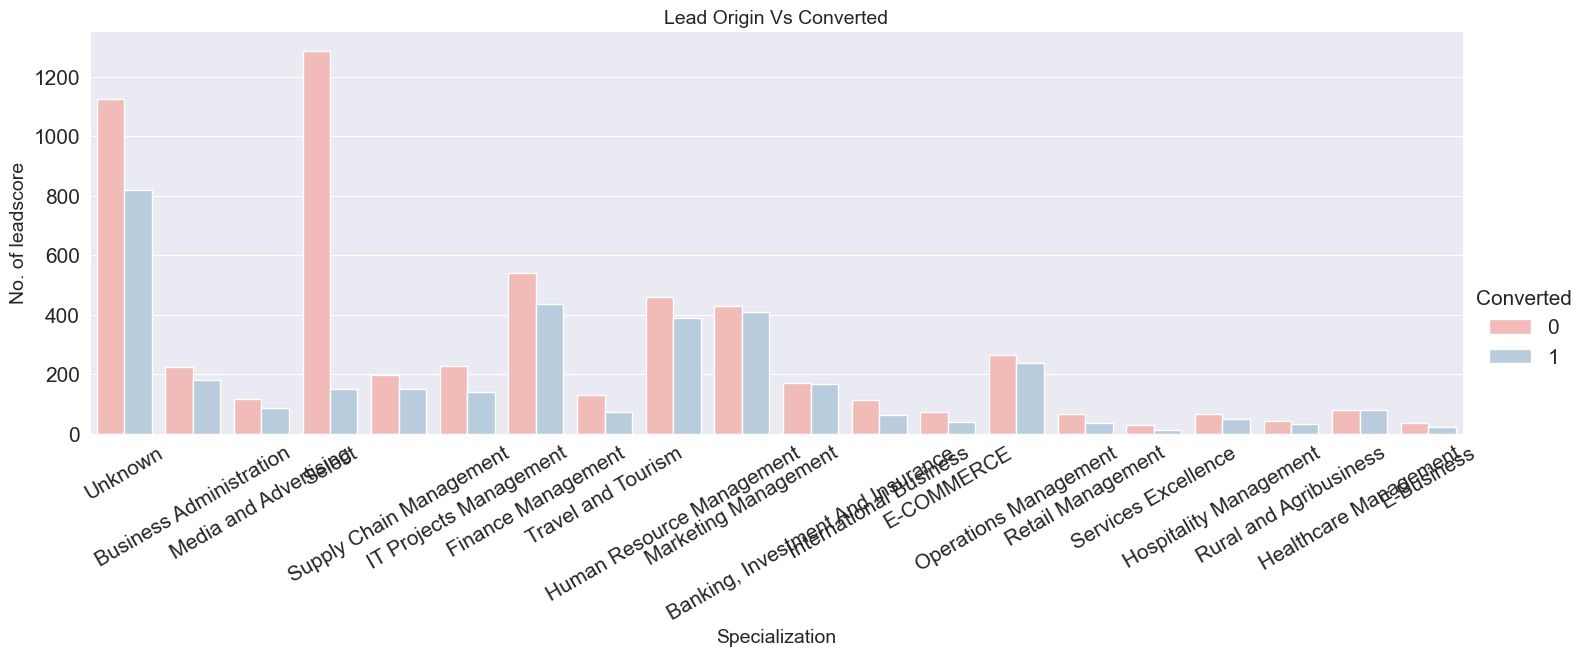

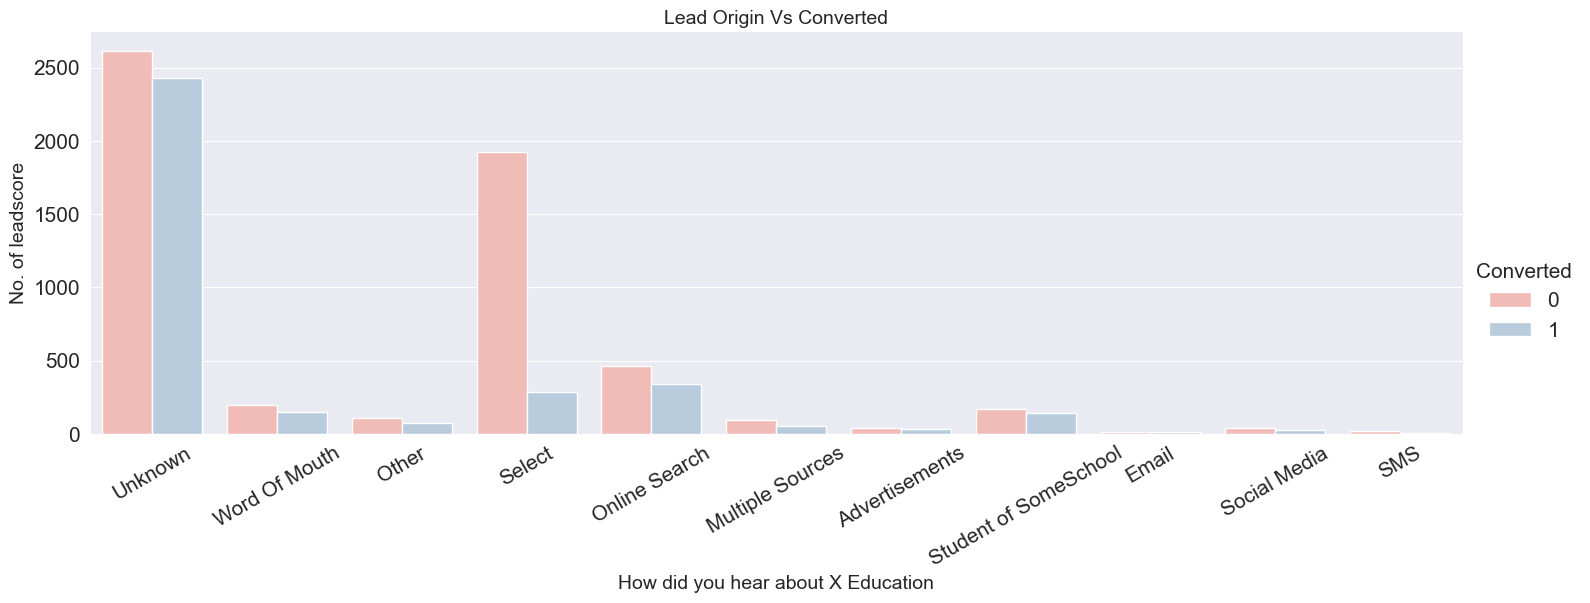

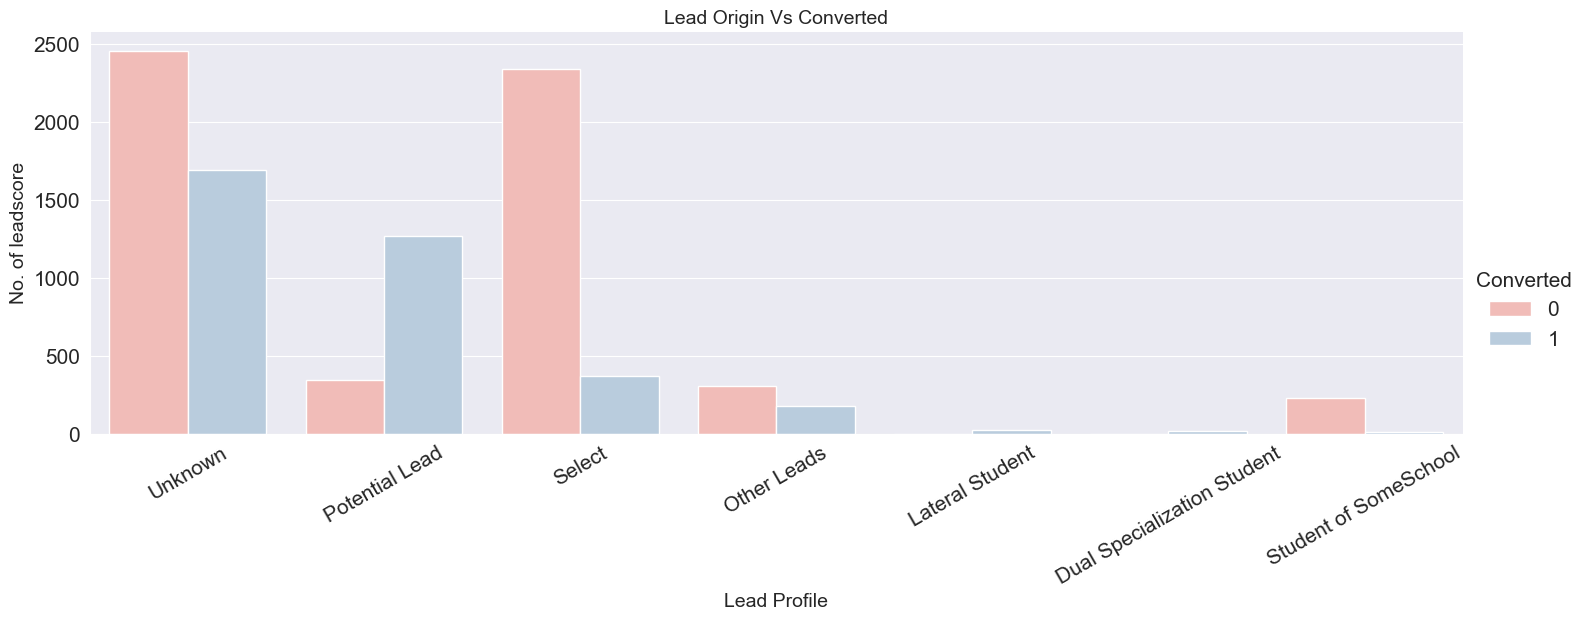

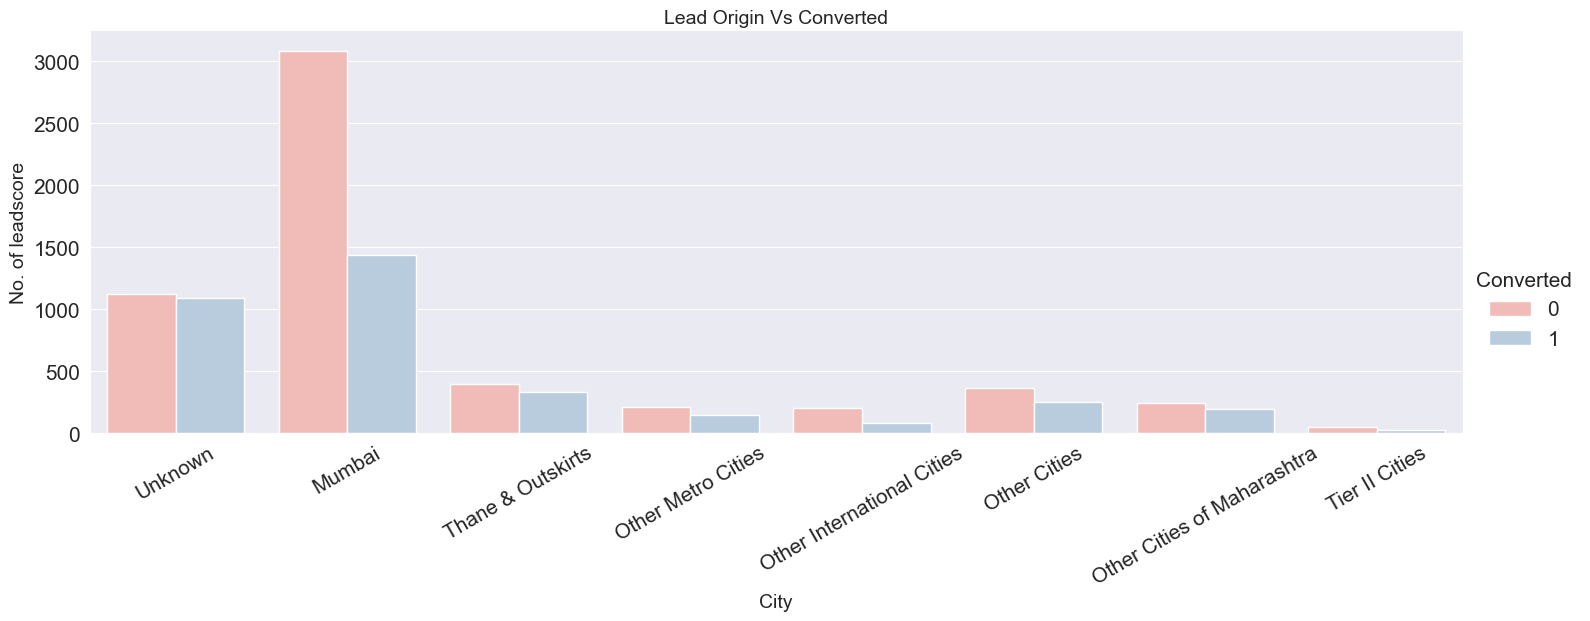

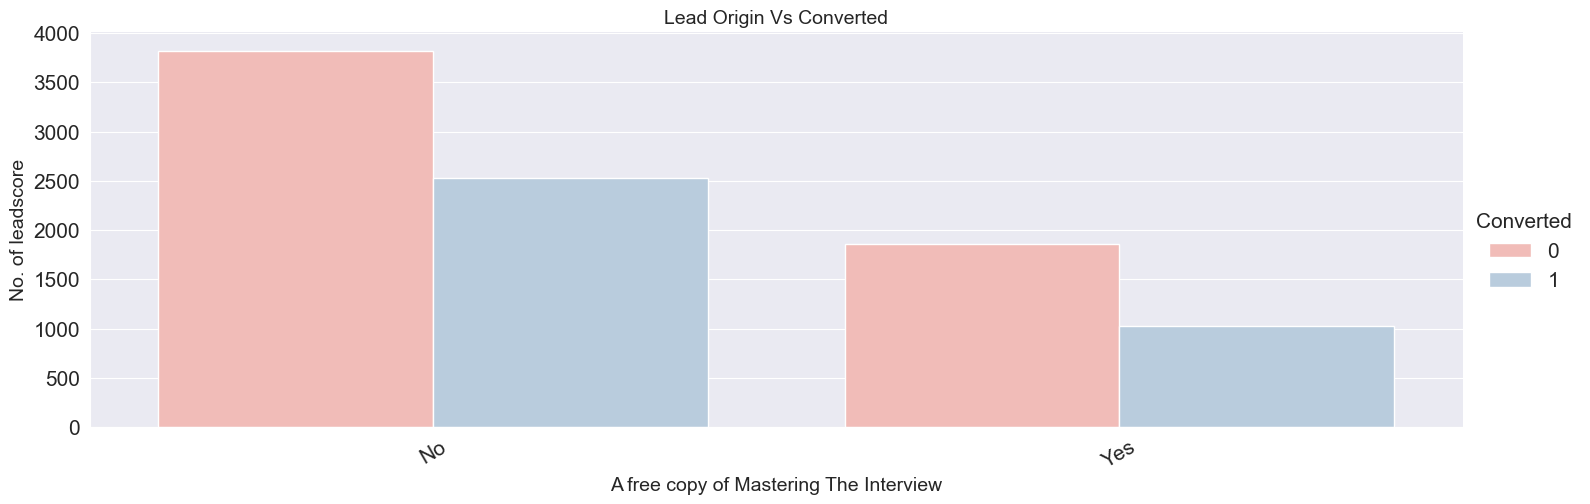

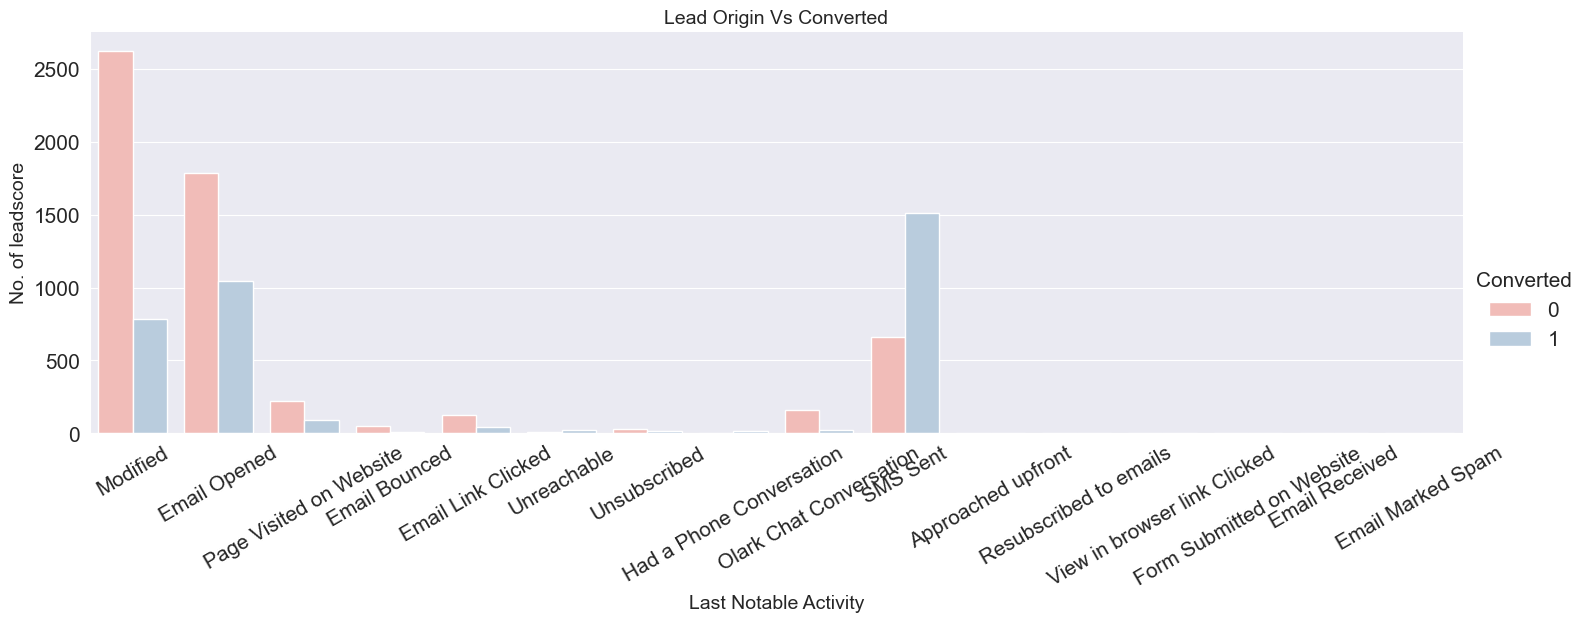

In [215]:
categorical_columns = leadscore.select_dtypes(include='object')
for i in categorical_columns:
    plt.rcParams.update({'font.size': 15})
    plot = sns.catplot(x=i, hue = "Converted", kind="count", data=leadscore, palette="Pastel1", aspect = 3);
    plt.title('Lead Origin Vs Converted', fontsize = 14)
    plt.xlabel(i, fontsize = 14)
    plt.ylabel("No. of leadscore", fontsize = 14)
    plt.xticks(rotation=30)
    plt.show()

#### Outlier Handing

In [216]:
leadscore.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.000000,0.000000,0.000000,Page Visited on Website,Unknown,Unknown,Unknown,Unknown,No,Modified
1,API,Organic Search,0,1.495349,5.095244,1.257433,Email Opened,Unknown,Unknown,Unknown,Unknown,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,1.189207,6.256259,1.189207,Email Opened,Business Administration,Unknown,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.000000,4.179025,1.000000,Unreachable,Media and Advertising,Word Of Mouth,Unknown,Mumbai,No,Modified
4,Landing Page Submission,Google,1,1.189207,6.147267,1.000000,Converted to Lead,Unknown,Other,Unknown,Mumbai,No,Modified


In [217]:
continuous_features = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

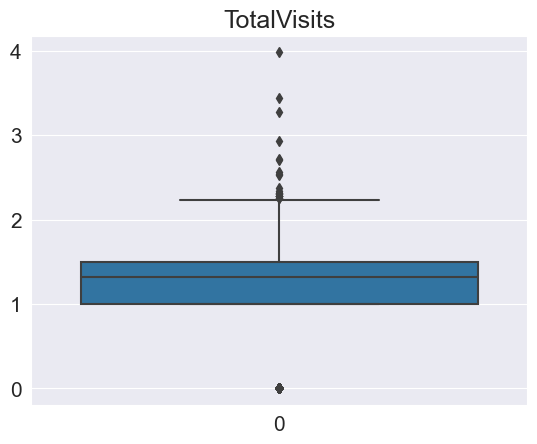

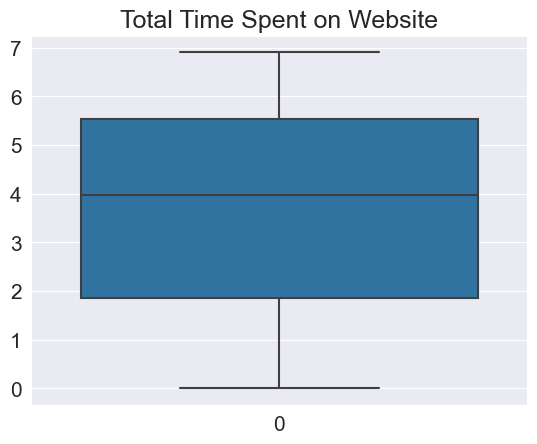

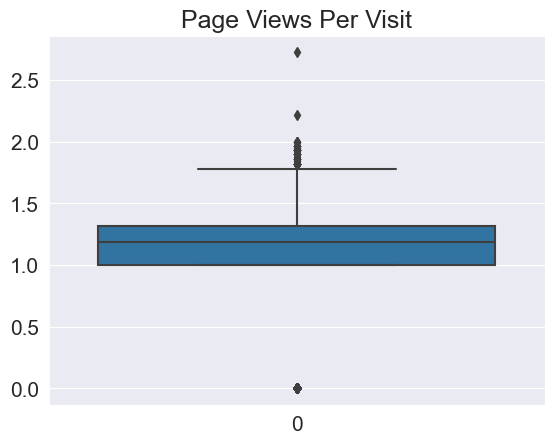

In [218]:
# checking for outliers
for i in continuous_features:
    sns.boxplot(leadscore[i])
    plt.title(i)
    plt.show()

In [219]:
continuous_features

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [220]:
print("skewness of each column after Outlier Handling")
for column in continuous_features:
    Q1= np.percentile(leadscore[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(leadscore[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    median = leadscore[column].quantile(0.50)
    leadscore[column] = np.where(leadscore[column] <=(Q1-1.5*IQR), median,leadscore[column])
    leadscore[column] = np.where(leadscore[column] >=(Q3+1.5*IQR), median,leadscore[column])
    print(column, "->", leadscore[column].skew())

skewness of each column after Outlier Handling
TotalVisits -> 0.9899348414986421
Total Time Spent on Website -> -0.48455832773310686
Page Views Per Visit -> 0.7565388241513398


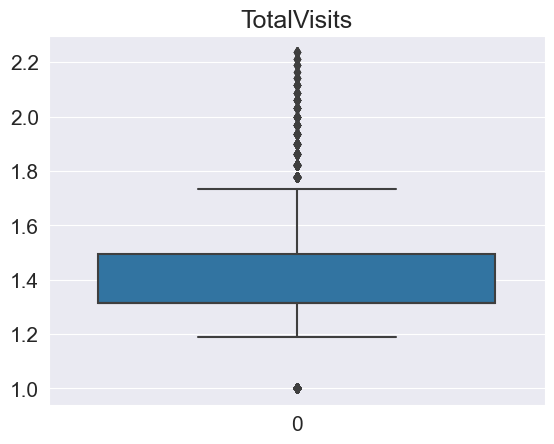

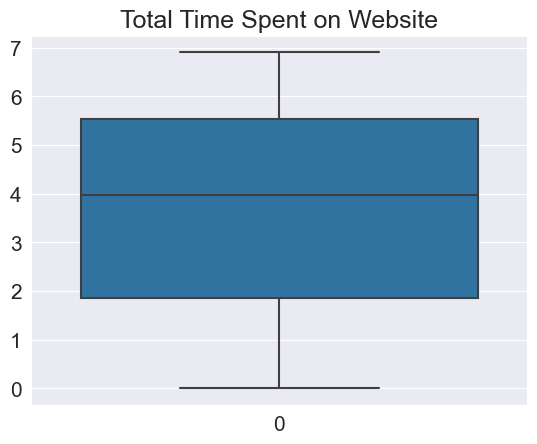

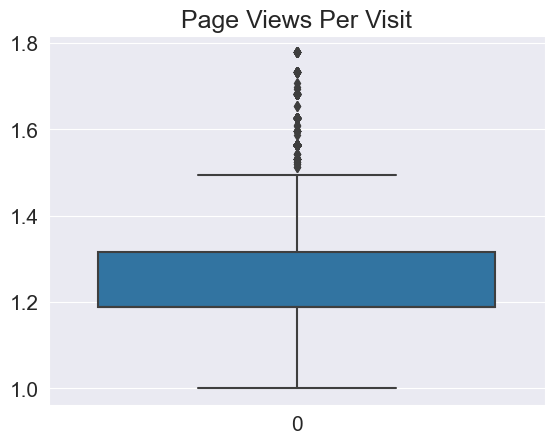

In [221]:
for i in continuous_features:
    sns.boxplot(leadscore[i])
    plt.title(i)
    plt.show()

In [222]:
len(columns_drop)

19

In [223]:
leadscore.shape

(9240, 13)

#### Train Test Split

In [448]:
X = leadscore.drop(columns=["Converted"])
y = leadscore["Converted"]

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [450]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7392, 12)
(7392,)
(1848, 12)
(1848,)


### Data Preparation and selection

In [451]:
X_train.columns

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [452]:
continuous_features = X_train.select_dtypes(exclude='object').columns
continuous_features

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [453]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [454]:
X_train[categorical_columns].head()

,Lead Origin,Lead Source,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


##### binary Features

In [455]:
binary_features = ["A free copy of Mastering The Interview"]

In [456]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
binary_data = X_train[binary_features].apply(binary_map)
binary_data.reset_index(inplace=True, drop=True)
binary_data.head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,1


In [457]:
binary_data_test = X_test[binary_features].apply(binary_map)
binary_data_test.reset_index(inplace=True, drop=True)
binary_data_test.head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,0


##### Non Binary Features

In [458]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [459]:
ohe = OneHotEncoder(use_cat_names=True)
encoded_data = ohe.fit_transform(X_train[categorical_columns])
encoded_data_test = ohe.transform(X_test[categorical_columns])

In [460]:
encoded_data.reset_index(inplace=True, drop=True)
encoded_data_test.reset_index(inplace=True, drop=True)

In [461]:
encoded_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Organic Search,...,Last Notable Activity_Email Bounced,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
pickle.dump(ohe, open('models/oneHotEncoding.pkl', 'wb'))

In [463]:
X_train.isna().sum() 

Lead Origin                               0
Lead Source                               0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [464]:
X_test.isna().sum() 

Lead Origin                               0
Lead Source                               0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Continuous

In [465]:
X_train[continuous_features].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
5321,1.414214,3.931873,1.414214
2575,1.316074,0.000000,1.189207
3363,1.189207,4.057349,1.189207
955,1.681793,2.672345,1.414214
6406,1.000000,3.121986,1.000000


In [466]:
X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,1.414214,3.931873,1.414214,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,1.316074,0.000000,1.189207,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,1.189207,4.057349,1.189207,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,1.681793,2.672345,1.414214,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,1.000000,3.121986,1.000000,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


#### Standardize the Data

In [467]:
sc = StandardScaler()
continuous_data=pd.DataFrame(sc.fit_transform(X_train[continuous_features]), columns=X_train[continuous_features].columns)
continuous_data

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.205465,0.195373,0.995975
1,-0.299305,-1.556144,-0.477936
2,-0.951831,0.251268,-0.477936
3,1.581728,-0.365704,0.995975
4,-1.924996,-0.165405,-1.717342
...,...,...,...
7387,0.205465,0.552439,0.995975
7388,-0.299305,0.232641,0.353109
7389,-0.951831,0.251268,-1.717342
7390,-0.951831,0.488702,-0.477936


In [468]:
continuous_data_test=pd.DataFrame(sc.transform(X_test[continuous_features]), columns=X_test[continuous_features].columns)
continuous_data_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,-0.299305,-1.556144,-0.477936
1,0.205465,1.217525,-0.477936
2,-0.299305,0.963794,-1.018519
3,-0.951831,0.088959,-0.477936
4,2.698029,1.314717,0.527358
...,...,...,...
1843,0.981453,0.145661,1.984260
1844,-0.299305,-1.556144,-0.477936
1845,-0.951831,-0.560051,-0.477936
1846,-0.299305,-1.556144,-0.477936


In [469]:
pickle.dump(ohe, open('models/standardScaler.pkl', 'wb'))

#### Concatinate All Data

In [470]:
X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,1.414214,3.931873,1.414214,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,1.316074,0.000000,1.189207,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,1.189207,4.057349,1.189207,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,1.681793,2.672345,1.414214,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,1.000000,3.121986,1.000000,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


In [471]:
X_train = pd.concat([binary_data, encoded_data, continuous_data], axis=1)
X_train.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.205465,0.195373,0.995975
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.299305,-1.556144,-0.477936
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.951831,0.251268,-0.477936
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.581728,-0.365704,0.995975
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-1.924996,-0.165405,-1.717342


In [472]:
X_test = pd.concat([binary_data_test, encoded_data_test, continuous_data_test], axis=1)
X_test.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.299305,-1.556144,-0.477936
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.205465,1.217525,-0.477936
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.299305,0.963794,-1.018519
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.951831,0.088959,-0.477936
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.698029,1.314717,0.527358


In [473]:
X_train.isna().sum()

A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Lead Add Form                   0
Lead Origin_API                             0
Lead Origin_Lead Import                     0
                                           ..
Last Notable Activity_Approached upfront    0
Last Notable Activity_Email Received        0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Length: 105, dtype: int64

In [474]:
X_test.isna().sum()

A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Lead Add Form                   0
Lead Origin_API                             0
Lead Origin_Lead Import                     0
                                           ..
Last Notable Activity_Approached upfront    0
Last Notable Activity_Email Received        0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Length: 105, dtype: int64

#### Feature Selection

In [475]:
# Fitting Logistic model 
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train, y_train)
# Rank features by importance
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)

In [476]:
[columns_drop.append(x) for x in feature[feature["importance"]<=0].column]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [477]:
X_train_fs=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test=X_test[[x for x in feature[feature["importance"]>0].column]]
X_train_fs.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Lead Source_Olark Chat,Lead Profile_Dual Specialization Student,Last Activity_Approached upfront,Total Time Spent on Website,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,...,A free copy of Mastering The Interview,A free copy of Mastering The Interview_Yes,City_Other Cities,City_Tier II Cities,Lead Profile_Other Leads,City_Other Metro Cities,"Specialization_Banking, Investment And Insurance",Specialization_Human Resource Management,How did you hear about X Education_Unknown,City_Mumbai
0,0,0,0,0,0,0.195373,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,-1.556144,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0.251268,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,-0.365704,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,-0.165405,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


#### VIF

In [478]:
vif = pd.DataFrame()
vif['Features'] = X_train_fs.columns
vif['VIF'] = [variance_inflation_factor(X_train_fs.values, i) for i in range(X_train_fs.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
47,A free copy of Mastering The Interview_Yes,inf
46,A free copy of Mastering The Interview,inf
43,Last Activity_Email Marked Spam,inf
42,Last Notable Activity_Email Marked Spam,inf
12,Last Notable Activity_Resubscribed to emails,inf
13,Last Activity_Resubscribed to emails,inf
0,Lead Origin_Lead Add Form,18.29
20,A free copy of Mastering The Interview_No,16.05
36,Lead Source_Reference,14.41
1,Lead Source_Welingak Website,4.85


In [479]:
[columns_drop.append(x) for x in list(vif[vif['VIF']>=5]['Features'])]

[None, None, None, None, None, None, None, None, None]

In [480]:
len(columns_drop)

193

In [481]:
X_train_vif = X_train_fs[[x for x in list(vif[vif['VIF']<5]['Features'])]]
X_test_vif = X_test[[x for x in list(vif[vif['VIF']<5]['Features'])]]

In [482]:
X_train_vif.shape

(7392, 47)

In [483]:
X_test_vif.shape

(1848, 47)

#### PCA

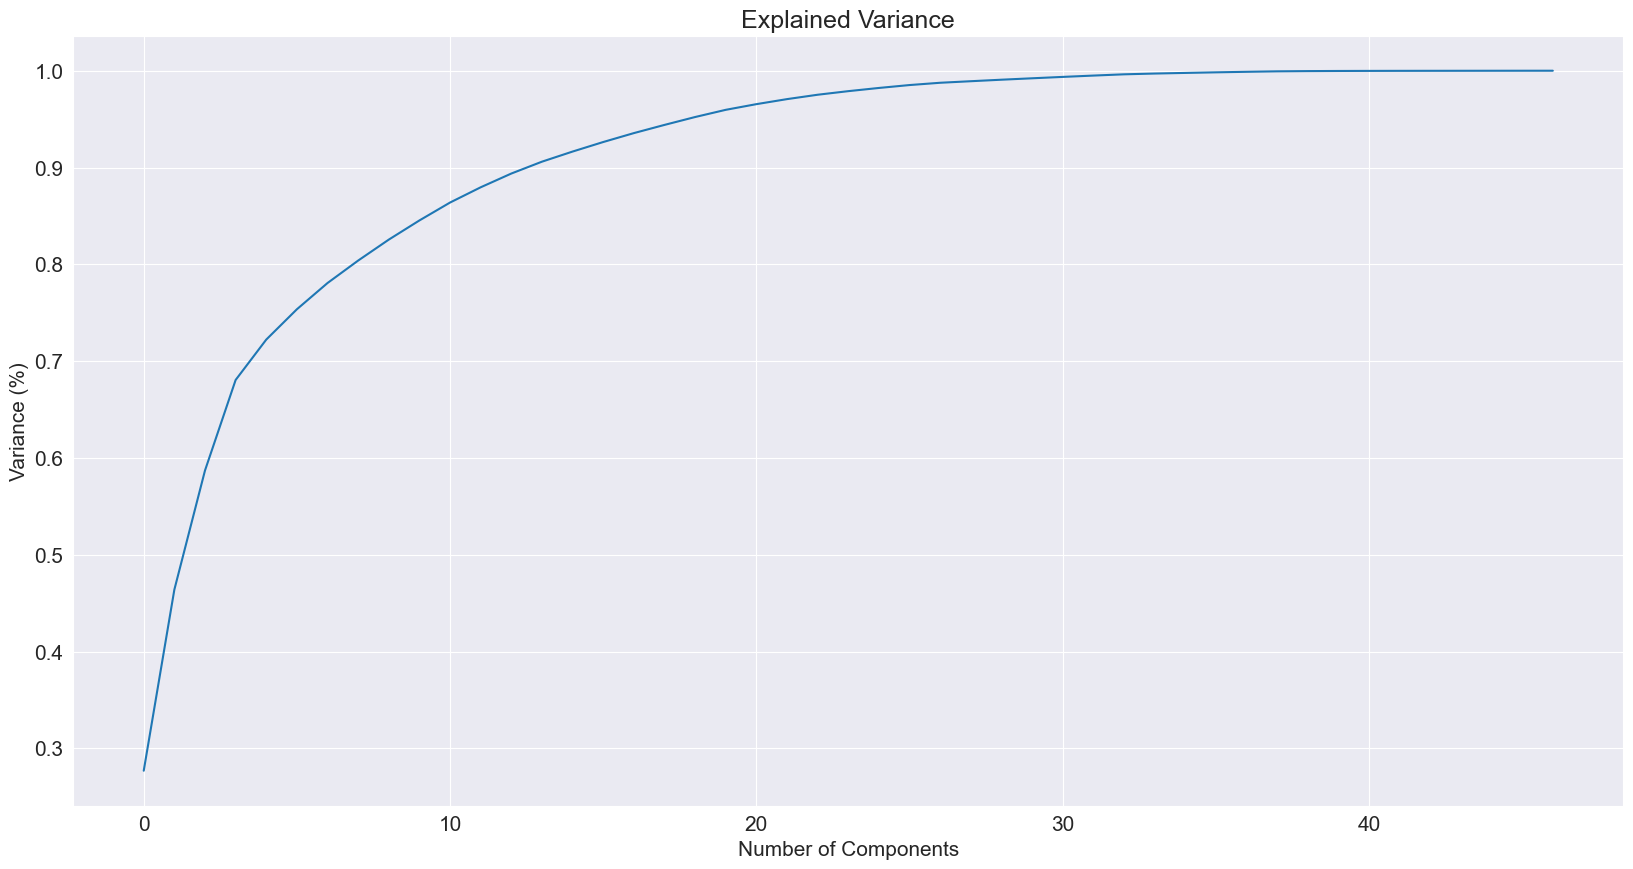

In [484]:
pca = PCA()
principalComponents = pca.fit_transform(X_train_vif)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [485]:
comp_count = 15
pca_columns = []
for i in range(1,comp_count+1):
    pca_columns.append("PC"+str(i))

In [486]:

pca = PCA(n_components=comp_count)
new_data = pca.fit_transform(X_train_vif)
# This will be the new data fed to the algorithm.
X_train_pca = pd.DataFrame(data = new_data
             , columns = pca_columns)


In [487]:

new_data_test = pca.transform(X_test_vif)
# This will be the new data fed to the algorithm.
X_test_pca = pd.DataFrame(data = new_data_test
             , columns = pca_columns)


In [488]:
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.404931,0.067774,-0.784863,-0.320226,0.240784,0.065392,-0.379389,0.032694,0.141025,0.012922,0.214499,-0.058768,0.426943,-0.157325,0.405097
1,-1.247166,0.517910,1.078877,0.721121,0.693049,0.687752,0.390033,0.069321,0.124575,0.076225,-0.183116,-0.382970,0.138697,0.062437,0.111707
2,-0.364627,-0.848346,-0.797289,-0.426207,-0.682571,0.815302,-0.100630,-0.035881,-0.062291,0.022179,-0.166193,-0.299014,0.019088,0.581097,0.097112
3,0.546264,1.434130,0.855753,-0.450739,-0.491443,-0.580543,0.226727,-0.009483,-0.075949,-0.047934,0.174728,-0.351053,0.032212,-0.054385,-0.053401
4,-1.269433,-1.377595,-1.160903,0.422548,-0.203852,-0.180606,0.202728,-0.063834,-0.015130,-0.022820,-0.017916,-0.404147,-0.000109,-0.056965,-0.011029


In [489]:
pickle.dump(ohe, open('models/PCA.pkl', 'wb'))

In [513]:
model = LogisticRegression()
selector = RFE(estimator = model, n_features_to_select = 18)
selector.fit(X_train_vif, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=18)

In [517]:
X_train_vif = X_train_vif[X_train_vif.columns[selector.support_]]

In [520]:
X_test_vif = X_test_vif[X_test_vif.columns[selector.support_]]

In [521]:
X_test_vif.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,City_Unknown,Last Notable Activity_SMS Sent,Total Time Spent on Website,Lead Source_Olark Chat,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Notable Activity_Had a Phone Conversation,Last Activity_Email Opened,Lead Profile_Potential Lead,Last Activity_Approached upfront,Lead Profile_Other Leads,Lead Source_Live Chat,Lead Origin_Quick Add Form,Lead Profile_Lateral Student,Last Notable Activity_Unreachable,Lead Profile_Dual Specialization Student
0,0,0,0,0,-1.556144,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,1.217525,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0.963794,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0.088959,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1.314717,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Storing Columns for Prediction Pipeline

## Model Building and Performance Measure

#### Logestic Regression

In [522]:
X_test_pca.shape

(1848, 15)

In [523]:
X_train_pca.shape

(7392, 15)

In [524]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train_pca,y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(X_train_pca,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(X_test_pca,y_test)*100,2)),"%")

Y_pred=Logit.predict(X_test_pca)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  76.6 %
Score the X-test  with Y-test  is :  76.84 %
Accuracy is  76.84 %


In [525]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
fpr = fp/ float(tn+fp)
fnr = fn/ float(tp+fn)
print("Sensitivity(True positive rate): ",recall)

print("False Positive Rate: ",fpr)

print("Specificity(True negative rate): ", tn/(tn+fp))

print("False Negative Rate: ",fnr)

print("Precision: ", precision)

print("F-Score: ",f1)

Sensitivity(True positive rate):  0.6419753086419753
False Positive Rate:  0.14924039320822163
Specificity(True negative rate):  0.8507596067917784
False Negative Rate:  0.35802469135802467
Precision:  0.7370078740157481
F-Score:  0.6862170087976539


In [526]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train_vif,y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=Logit.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  78.33 %
Score the X-test  with Y-test  is :  77.71 %
Accuracy is  77.71 %


In [530]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
fpr = fp/ float(tn+fp)
fnr = fn/ float(tp+fn)
print("Sensitivity(True positive rate): ",recall)

print("False Positive Rate: ",fpr)

print("Specificity(True negative rate): ", tn/(tn+fp))

print("False Negative Rate: ",fnr)

print("Precision: ", precision)

print("F-Score: ",f1)

Sensitivity(True positive rate):  0.6419753086419753
False Positive Rate:  0.13494191242180517
Specificity(True negative rate):  0.8650580875781948
False Negative Rate:  0.35802469135802467
Precision:  0.7560581583198708
F-Score:  0.6943620178041544


Closing Logestic regression ran after VIF ignoring PCA

In [541]:
y_train_pred = Logit.predict_proba(X_train_vif)


y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probabillity':y_train_pred[:,1]})
y_train_pred_final.head()


,Converted,Converted_Probabillity
0,0,0.196356
1,1,0.757952
2,0,0.203257
3,0,0.118519
4,0,0.059722


In [542]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.196356,0
1,1,0.757952,1
2,0,0.203257,0
3,0,0.118519,0
4,0,0.059722,0


##### AUC and ROC

In [543]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.196356,0
1,1,0.757952,1
2,0,0.203257,0
3,0,0.118519,0
4,0,0.059722,0


In [545]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probabillity, 
                                         drop_intermediate = False )

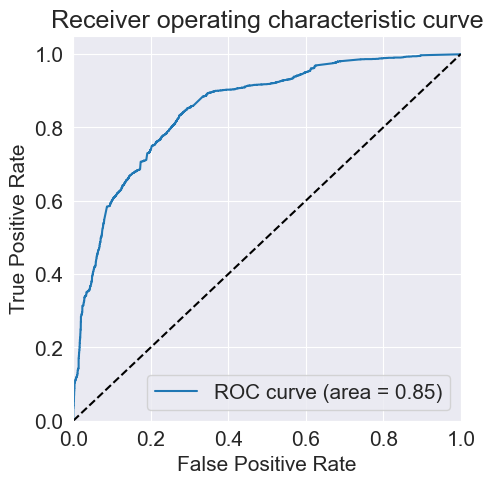

In [546]:
auc_score = roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Probabillity)
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [548]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0


In [549]:
probabillity_cutoff = pd.DataFrame( columns = ['probabillity','accuracy','sensitivity','specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    probabillity_cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
probabillity_cutoff

,probabillity,accuracy,sensitivity,specificity
0.0,0.0,0.383117,1.000000,0.000000
0.1,0.1,0.532873,0.985876,0.251535
0.2,0.2,0.689935,0.913136,0.551316
0.3,0.3,0.765557,0.835452,0.722149
0.4,0.4,0.774080,0.711158,0.813158
0.5,0.5,0.783279,0.657133,0.861623
0.6,0.6,0.786255,0.581215,0.913596
0.7,0.7,0.733631,0.382062,0.951974
0.8,0.8,0.723891,0.322387,0.973246
0.9,0.9,0.662744,0.139831,0.987500


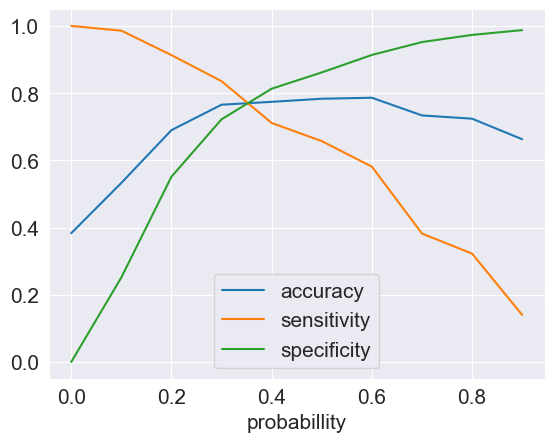

In [554]:
probabillity_cutoff.plot.line(x='probabillity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [555]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map( lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0


In [556]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Probabillity.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Score
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0,20
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0,76
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0,20
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0,12
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0,0.243522,0,1,1,1,0,0,0,0,0,0,0,24
7388,0,0.079507,0,1,0,0,0,0,0,0,0,0,0,8
7389,0,0.596221,1,1,1,1,1,1,1,0,0,0,0,60
7390,0,0.378599,1,1,1,1,1,0,0,0,0,0,0,38


##### Score

### SVC

In [579]:
classifier = SVC(kernel='rbf', random_state=0, probability=True)  
classifier.fit(X_train_vif, y_train) 

SVC(probability=True, random_state=0)

In [580]:

print("Score the X-train with Y-train is : ", str(round(classifier.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(classifier.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=classifier.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  82.64 %
Score the X-test  with Y-test  is :  82.41 %
Accuracy is  82.41 %


In [582]:
y_train_pred = classifier.predict_proba(X_train_vif)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probabillity':y_train_pred[:,1]})
y_train_pred_final.head()

,Converted,Converted_Probabillity
0,0,0.134871
1,1,0.838238
2,0,0.134316
3,0,0.081759
4,0,0.140620


In [583]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.134871,0
1,1,0.838238,1
2,0,0.134316,0
3,0,0.081759,0
4,0,0.140620,0


#### AUC and ROC

In [584]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.134871,0
1,1,0.838238,1
2,0,0.134316,0
3,0,0.081759,0
4,0,0.140620,0


In [585]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probabillity, 
                                         drop_intermediate = False )

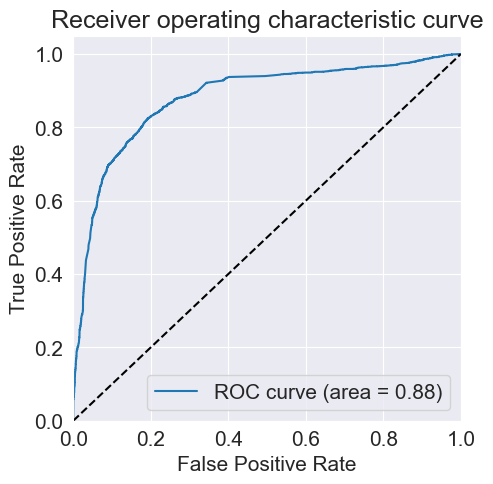

In [586]:
auc_score = roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Probabillity)
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [587]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0


In [588]:
probabillity_cutoff = pd.DataFrame( columns = ['probabillity','accuracy','sensitivity','specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    probabillity_cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
probabillity_cutoff

,probabillity,accuracy,sensitivity,specificity
0.0,0.0,0.383117,1.000000,0.000000
0.1,0.1,0.418696,0.991525,0.062939
0.2,0.2,0.811824,0.829096,0.801096
0.3,0.3,0.821293,0.763065,0.857456
0.4,0.4,0.824540,0.721751,0.888377
0.5,0.5,0.827516,0.701624,0.905702
0.6,0.6,0.825758,0.683616,0.914035
0.7,0.7,0.823052,0.659605,0.924561
0.8,0.8,0.810335,0.605932,0.937281
0.9,0.9,0.645969,0.079802,0.997588


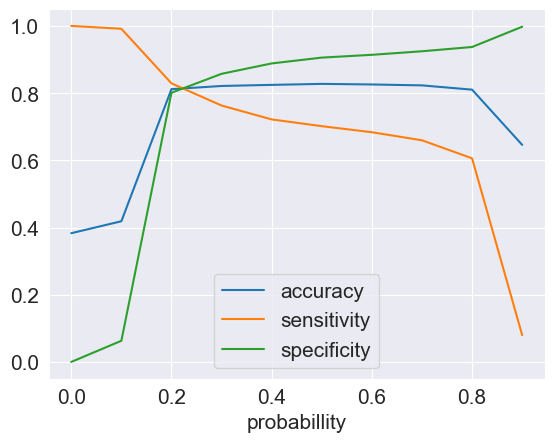

In [589]:
probabillity_cutoff.plot.line(x='probabillity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [590]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0


In [591]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Probabillity.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Score
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0,13
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0,84
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0,13
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0,8
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0,0.142934,0,1,1,0,0,0,0,0,0,0,0,14
7388,0,0.144577,0,1,1,0,0,0,0,0,0,0,0,14
7389,0,0.058091,0,1,0,0,0,0,0,0,0,0,0,6
7390,0,0.054270,0,1,0,0,0,0,0,0,0,0,0,5


#### Random Forst

In [ ]:
randclf = RandomForestClassifier()
randclf.fit(X_train_vif, y_train) 

RandomForestClassifier()

In [ ]:

print("Score the X-train with Y-train is : ", str(round(randclf.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(randclf.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=randclf.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  94.33 %
Score the X-test  with Y-test  is :  77.76 %
Accuracy is  77.76 %
